In [1]:
from scipy.signal import find_peaks
import numpy as np
from LAB_UW_forward_modeling import *
from LAB_UW_functions import *
import os
import matplotlib.pyplot as plt 
import glob
import pandas as pd

In [2]:

def find_mechanical_data(file_path_list, pattern):
    """
    Trova un file specifico all'interno di una lista di percorsi dei file utilizzando un pattern.
    
    Args:
        file_path_list (list): Lista di percorsi dei file in cui cercare il file.
        pattern (str): Pattern per il nome del file da cercare.
    
    Returns:
        str: Percorso completo del file trovato, o None se non viene trovato nessun file corrispondente.
    """
    for file_path in file_path_list:
        if glob.fnmatch.fnmatch(file_path, pattern):
            print("MECHANICAL DATA CHOOSE:", file_path)
            return file_path
    return None  # Nessun file trovato nella lista
    

def find_sync_values(mech_data_path):
    """
    Trova i valori di picco sincronizzazione all'interno di un file di dati meccanici.

    Questa funzione legge un file CSV contenente dati meccanici, estrae la colonna
    relativa alla sincronizzazione e individua i picchi di sincronizzazione in base
    ai parametri specificati.

    Args:
        mech_data_path (str): Percorso del file CSV contenente i dati meccanici.

    Returns:
        numpy.ndarray: Un array NumPy contenente gli indici dei picchi di sincronizzazione
                       trovati nei dati meccanici.
    """
    mech_data = pd.read_csv(mech_data_path, sep=',', skiprows=[1])
    sync_data = mech_data.sync
    
    # Trova i picchi di sincronizzazione nei dati sincronizzazione
    sync_peaks, _ = find_peaks(sync_data, prominence=4.2, height=4)
    print(sync_peaks)
    return mech_data, sync_data, sync_peaks

def plot_sync_peaks(sync_data, sync_peaks, experiment_name):
    """
    Visualizza i picchi di sincronizzazione su un grafico dei dati di sincronizzazione.

    Questa funzione prende i dati di sincronizzazione e gli indici dei picchi di sincronizzazione,
    quindi crea un grafico per visualizzare sia i dati di sincronizzazione che i picchi di sincronizzazione
    evidenziati in rosso.

    Args:
        sync_data (numpy.ndarray): Array NumPy contenente i dati di sincronizzazione.
        sync_peaks (numpy.ndarray): Array NumPy contenente gli indici dei picchi di sincronizzazione.
        experiment_name (str): Nome dell'esperimento o della prova da visualizzare nel titolo del grafico.
    """
    
    plt.figure(figsize=(10, 4))
    plt.title(f'Sync Peaks {experiment_name}')
    

    # Plot dei picchi di sincronizzazione evidenziati in rosso
    plt.scatter(np.arange(0, len(sync_data))[sync_peaks], sync_data[sync_peaks], c='r', s = 10, zorder = 2, alpha = 0.8)
    
    # Plot dei dati di sincronizzazione
    plt.plot(sync_data, zorder = 1, c = 'k', linewidth = 0.8)
    
    plt.ylabel('Arduino voltage [V]', fontsize=12)
    plt.xlabel('records #', fontsize=12)
    
    plt.show()
    



In [3]:
# Search Space for global optimization of the velocities
cmin = 1000        
cmax = 2000 
c_step = 5
c_gouge_list = np.arange(cmin, cmax,c_step) 


In [4]:
# Load Waveform data
machine_name = "Brava_2"
experiment_name = "s0103"
data_type_uw = 'data_tsv_files'
data_type_mech = 'mechanical_data'
sync_file_pattern = '*s*_data_rp' #pattern to find specific experiment in mechanical data

#MAKE MECHANICAL PATH LIST
infile_path_list_mech = make_infile_path_list(machine_name, experiment_name, data_type=data_type_mech)
#LOAD MECHANICAL DATA
mech_data_path= find_mechanical_data(infile_path_list_mech, sync_file_pattern)
mech_data, _ , sync_peaks = find_sync_values(mech_data_path)

MECHANICAL DATA CHOOSE: /home/michele/Desktop/Dottorato/active_source_implementation/experiments_Brava_2/s0103/mechanical_data/s0103sw06mont1020_data_rp
[  4833   8929  10846  19949  21747  25821  31188  65233  74894 118942
 154601 156625 161550 167109 168462 173290 174740 212394 226240 264730
 297994 392907 411811 462252]


In [5]:
mech_data

,Unnamed: 0,shear_stress_MPa,lp_disp_mm,ec_disp_mm,normal_stress_MPa,lt_ec_mm1,rgt_lt_mm,friction_na,sync,time_s,records_na
0,1,0.000000,0.000000,0.000000,1.000000e-07,4.999995,5.000000,0.000000,0.004719,1.000,1.0
1,2,0.000000,0.000000,0.000000,1.000000e-07,5.000042,4.999995,0.000000,0.004709,2.000,2.0
2,3,0.000000,0.000000,0.000000,1.000000e-07,4.999998,5.000042,0.000000,0.004707,3.000,3.0
3,4,0.000000,0.000000,0.000000,1.000000e-07,4.999997,4.999998,0.000000,0.004717,4.000,4.0
4,5,0.000000,0.000000,0.000000,1.000000e-07,4.999997,4.999997,0.000000,0.004721,5.000,5.0
...,...,...,...,...,...,...,...,...,...,...,...
474093,474094,-1.053817,17.907305,17.085706,-5.772397e+00,8.445902,8.744637,0.182561,0.004653,17240.455,474094.0
474094,474095,-1.057623,17.907438,17.085838,-5.701017e+00,8.446050,8.744435,0.185515,0.004896,17240.465,474095.0
474095,474096,-1.073653,17.907152,17.085552,-5.772577e+00,8.445873,8.744558,0.185992,0.004703,17240.475,474096.0
474096,474097,-1.075201,17.907256,17.085656,-5.730789e+00,8.446117,8.744390,0.187618,0.004866,17240.485,474097.0


/tmp/ipykernel_5406/3157444277.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


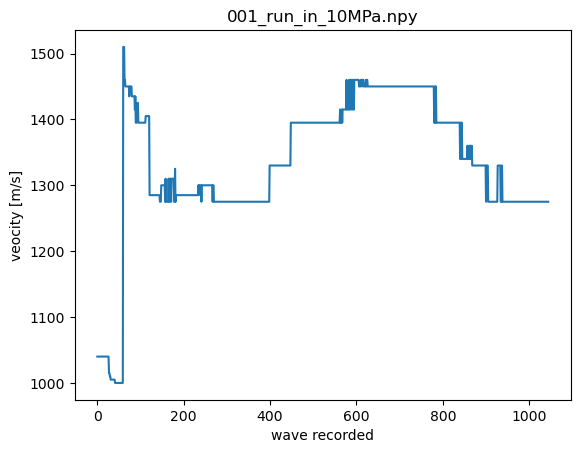

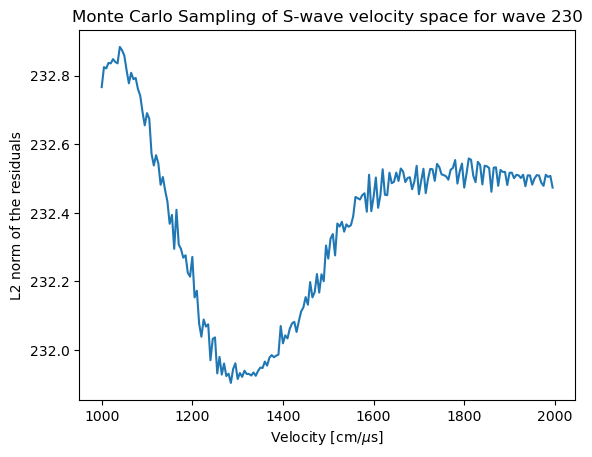

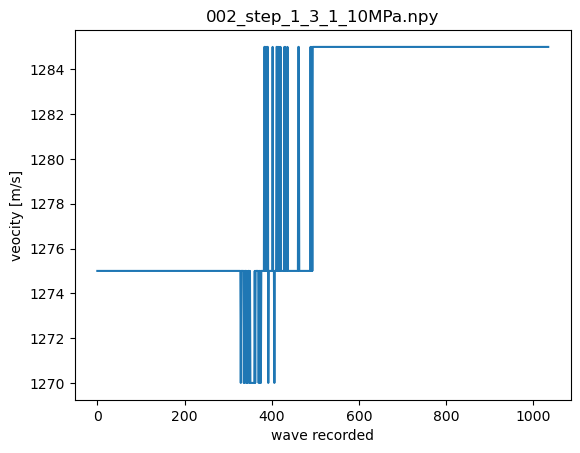

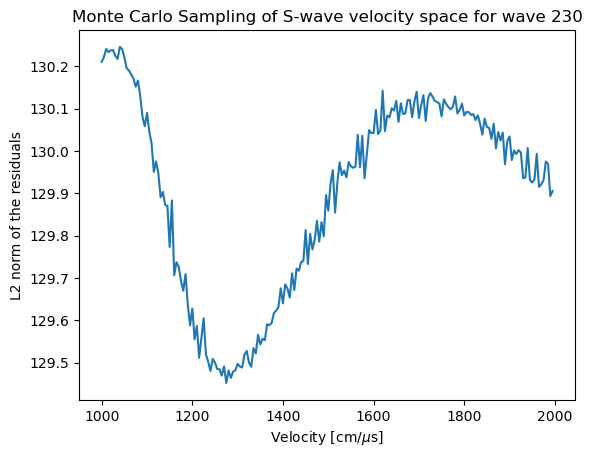

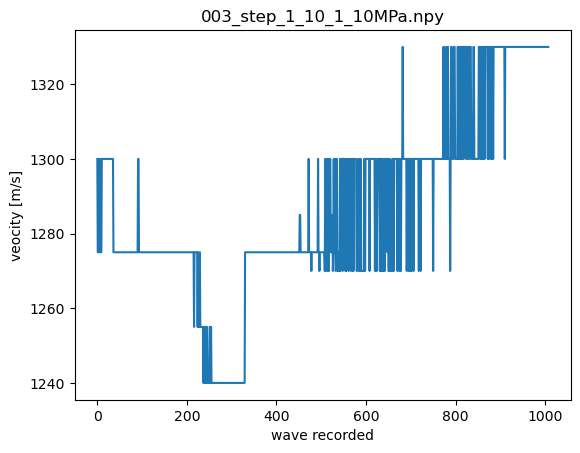

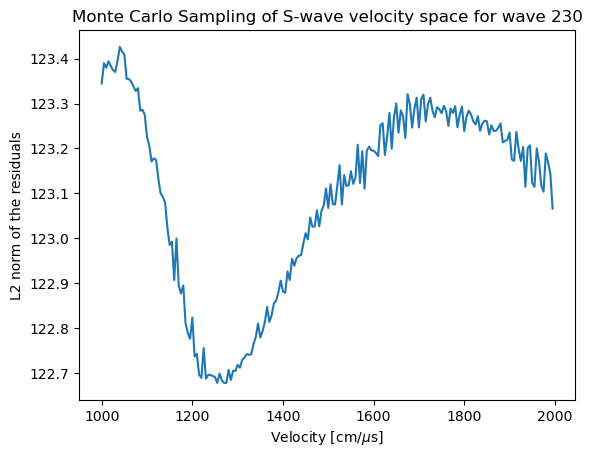

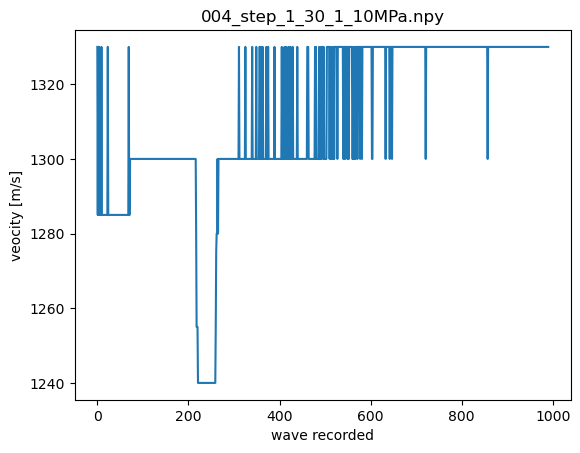

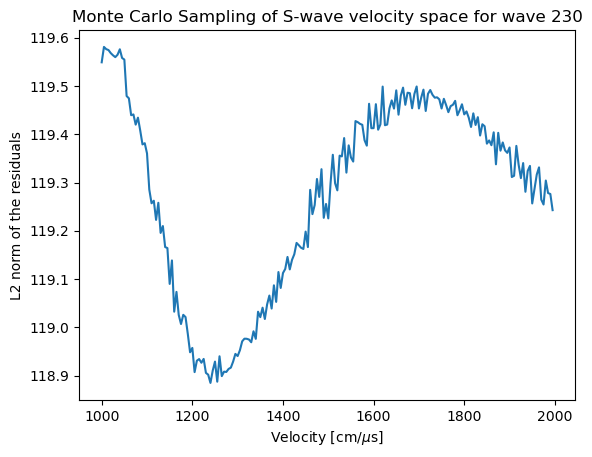

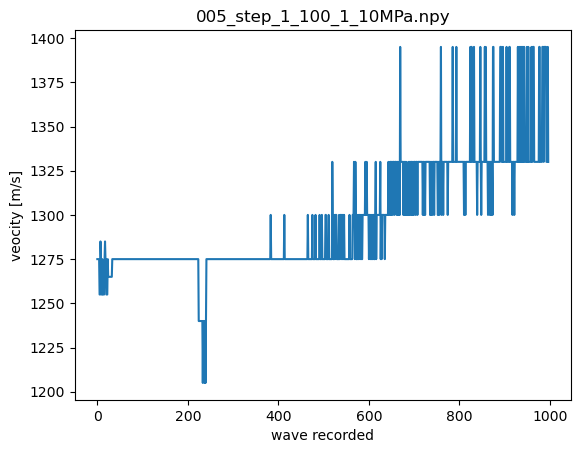

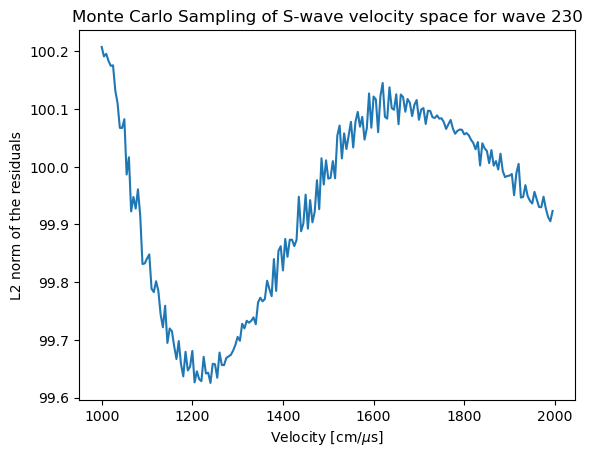

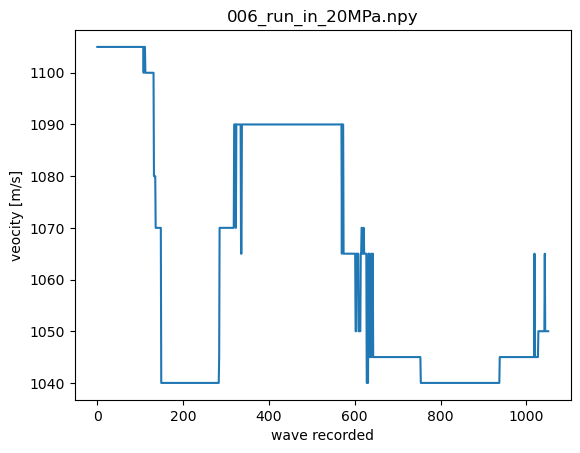

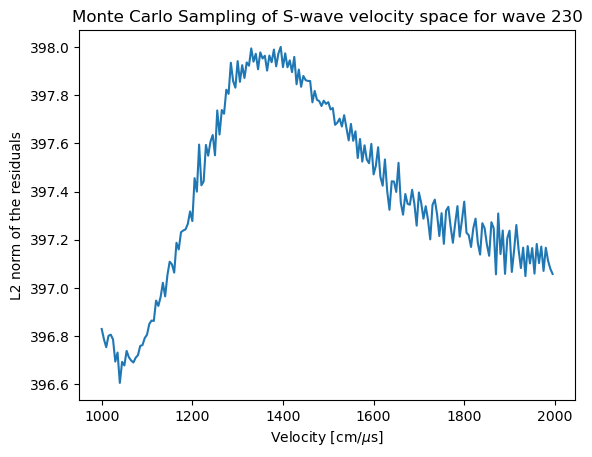

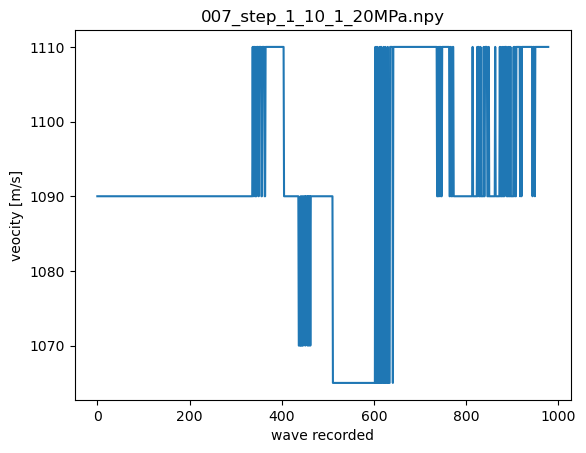

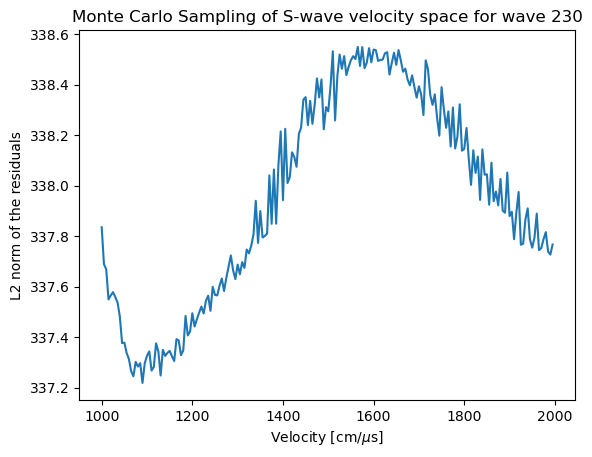

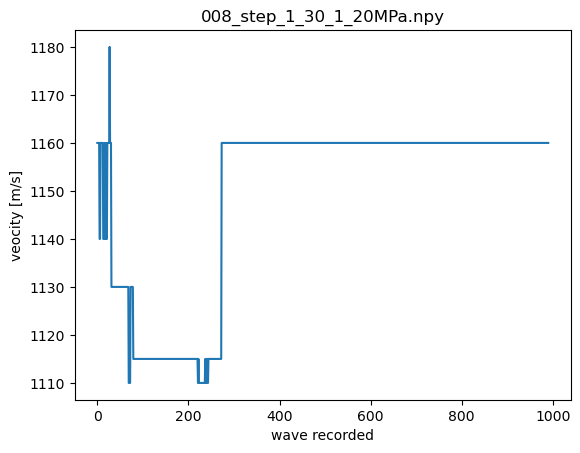

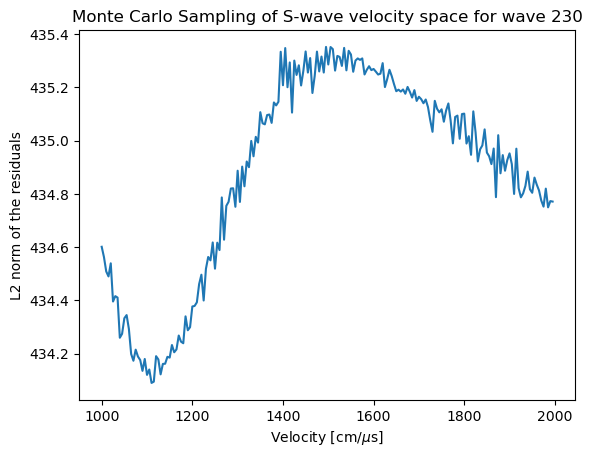

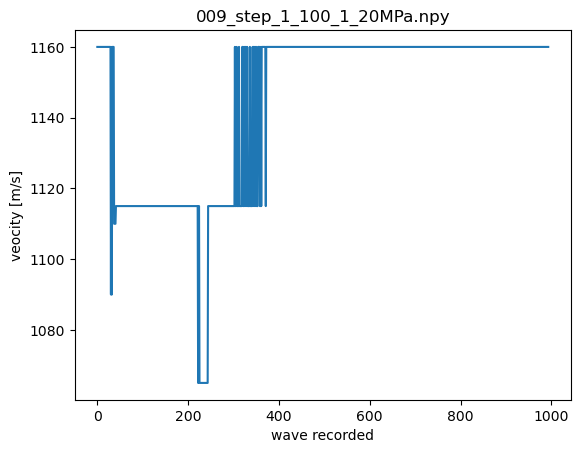

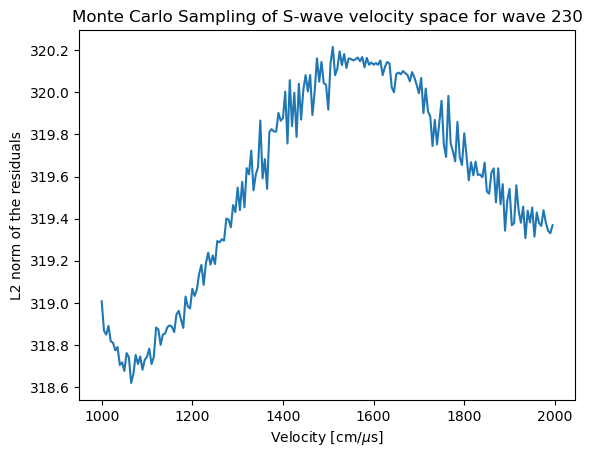

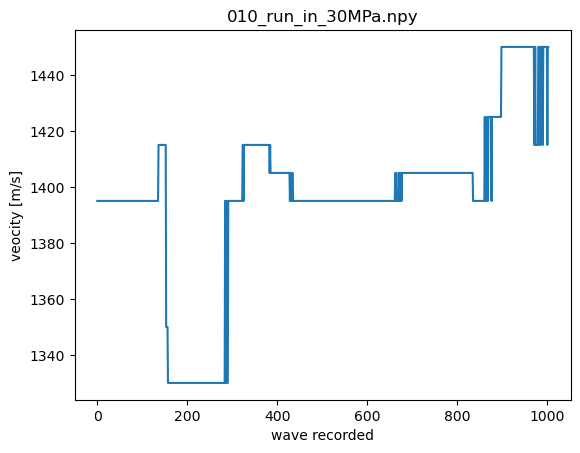

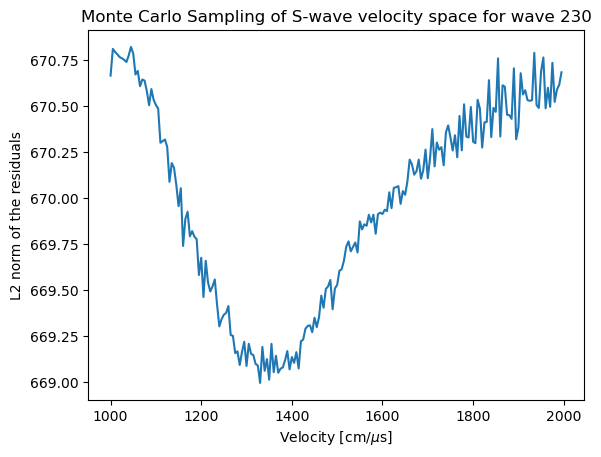

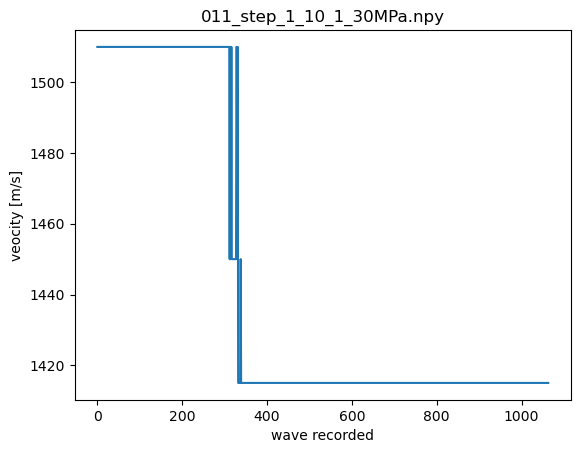

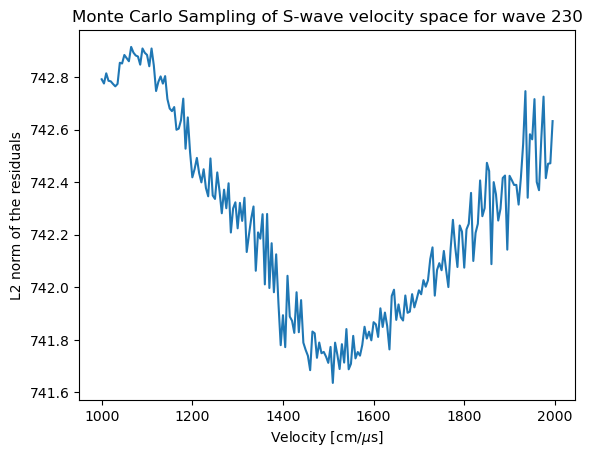

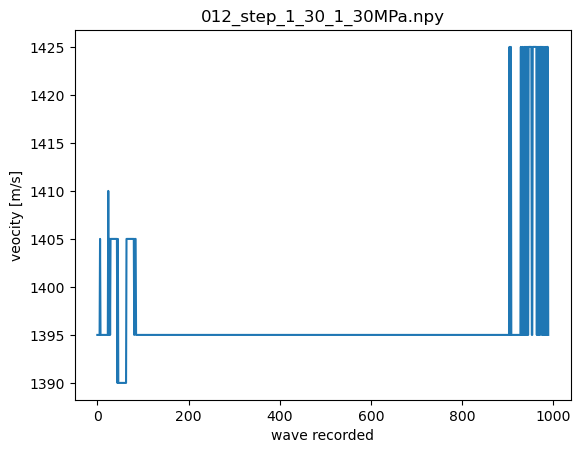

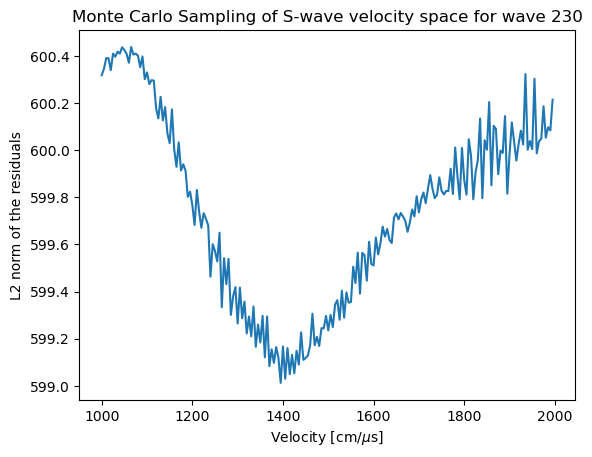

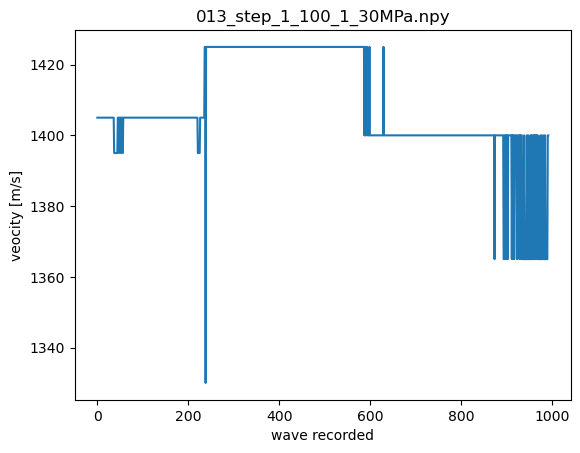

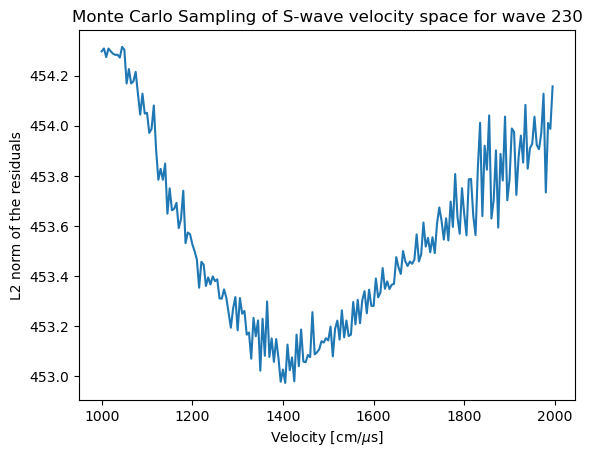

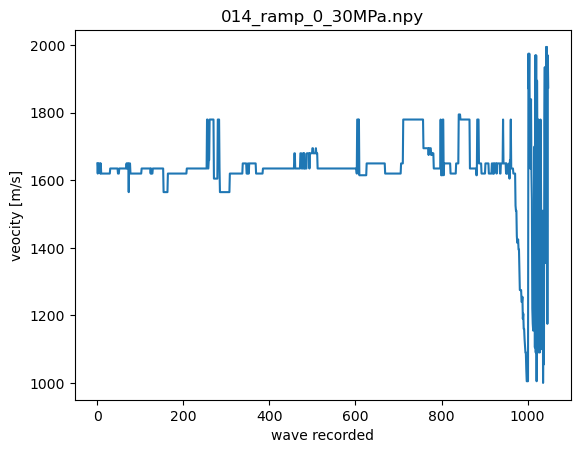

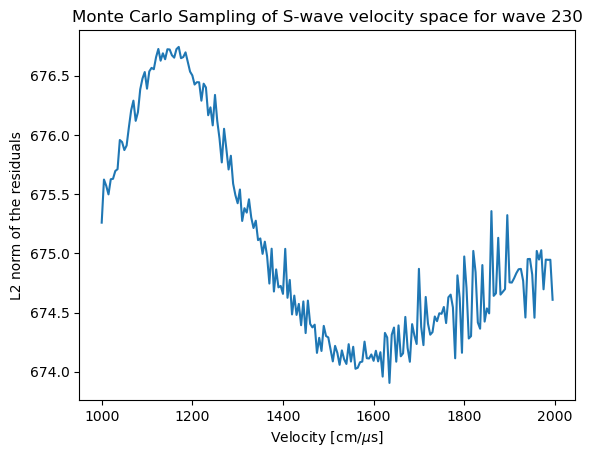

In [8]:
dir_path = "/home/michele/Desktop/Dottorato/active_source_implementation/experiments_Brava_2/s0103/data_analysis/global_optimization_velocity/workstation_ones"
for choosen_uw_file,file_name in enumerate(sorted(os.listdir(dir_path))):
    file_path = os.path.join(dir_path,file_name)
    l2_norm = np.load(file_path) 

    right_v = c_gouge_list[np.argmin(l2_norm, axis=1)]
    plt.figure()
    plt.plot(right_v)   
    plt.title(file_name)
    plt.ylabel('veocity [m/s]')
    plt.xlabel('wave recorded')
    
    number_of_waveforms_wanted = 1000
    thickness_gouge_1_list = mech_data.rgt_lt_mm[sync_peaks[2*choosen_uw_file]: sync_peaks[2*choosen_uw_file+1]].values/10  #the velocities are in cm/mus, layer thickness in mm. Divided by ten!!!
    downsampling = round(len(thickness_gouge_1_list)/number_of_waveforms_wanted)
    thickness_gouge_1_list = thickness_gouge_1_list[::downsampling]
    right_v = right_v[:len(thickness_gouge_1_list)]
    plt.figure()
    plt.scatter(thickness_gouge_1_list,right_v,s=5)
    plt.title('correlation layer thickness and shear velocity')
    plt.xlabel('layer thickness [cm]')
    plt.ylabel('shear velocity [m/s]')

    uw_choosen = 230
    plt.figure()
    plt.plot(c_gouge_list,l2_norm[uw_choosen,:])
    plt.xlabel('Velocity [cm/$\mu$s]')
    plt.ylabel('L2 norm of the residuals')
    plt.title(f'Monte Carlo Sampling of S-wave velocity space for wave {uw_choosen}')